# ML-Challenge-INTUIT

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('ship_data.csv') #importing the ship data

In [5]:
df.describe(include='all')

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,Irene Hunter,male,NaN,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644,NaN
mean,446.000000,2.308642,NaN,NaN,30.014244,0.523008,0.381594,32204.207969,NaN,0.383838
std,257.353842,0.836071,NaN,NaN,16.633418,1.102743,0.806057,49693.428597,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,-20.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,223.500000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,7910.400000,NaN,0.000000
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14454.200000,NaN,0.000000
75%,668.500000,3.000000,NaN,NaN,38.750000,1.000000,0.000000,31000.000000,NaN,1.000000


# Questions we can answer 

1) The	number	of	passengers	on	the	ship	based	on	Gender.	
2) The	number	of	passengers	on	the	ship	based	on	Class.	
3) The	number	of	passengers	on	the	ship	who	are	children	(Age	less	than	16	years).	
4) The	number	of	children	in	the	various	classes.	
5) The	number	of	passengers	who	were	alone	and	who	were	with	family.	
6) What	percentage	of	passengers	survived	in	each	Class ?	
7) the	percentage	of	passengers	who	survived based	on	Gender.	
8) Did	having	a	family	member	increased	the	chances	of	survival?	

### Number of passengers on the ship based on Gender.

In [6]:
df.Gender.value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [10]:
df.Gender.value_counts()/891*100

male      64.758698
female    35.241302
Name: Gender, dtype: float64

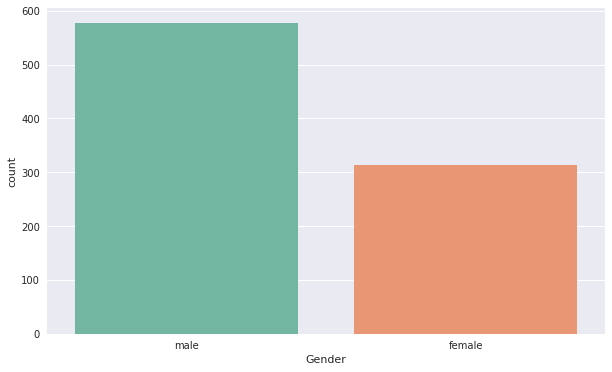

In [18]:
plt.subplots(figsize=(10,6))
sns.set(style="darkgrid")

ax = sns.countplot(x="Gender", data=df,palette = 'Set2')
plt.show()

There were 314 females and 577 males in the ship.
64.8% passengers were male and the rest 35.2% were females.

### Number of passengers on the ship based on Class.

In [19]:

df.Class.value_counts()


3    491
1    216
2    184
Name: Class, dtype: int64

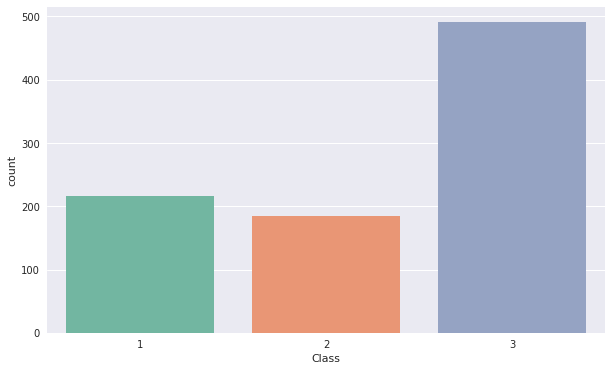

In [20]:
plt.subplots(figsize=(10,6))
sns.set(style="darkgrid")

ax = sns.countplot(x="Class", data=df,palette = 'Set2')
plt.show()

There were 216,184,491 people in Class 1 ,2 and 3 respectively

###  Number of passengers on the ship who are children (Age less than 16 years).

In [21]:
df['Children'] = df.Age<16

In [127]:
df.head()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0,False
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1,False
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1,False
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1,False
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0,False


In [22]:
df.Children.value_counts()

False    807
True      84
Name: Children, dtype: int64

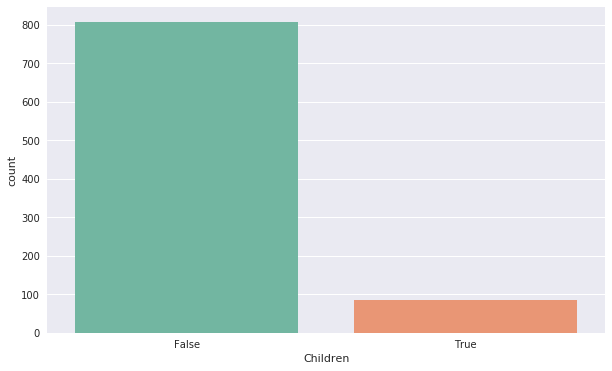

In [23]:
plt.subplots(figsize=(10,6))
sns.set(style="darkgrid")

ax = sns.countplot(x="Children", data=df,palette = 'Set2')
plt.show()

There were 84 Childrens in the ship.

### Number of children in the various classes.

In [24]:
df.groupby('Class')['Children'].sum()

Class
1     7.0
2    19.0
3    58.0
Name: Children, dtype: float64

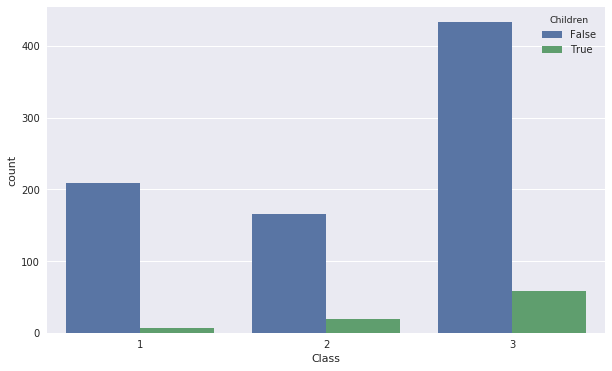

In [25]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Class',hue='Children',data=df)
plt.show()

There were 7 childrens in class one, 19 in class two and 58 in class 3

#### Removing outliers

In [26]:

x = (df.query('Age > 100 or  Age < 0'))
df = df.drop(x.index.astype(list))
df.describe()


,Passenger ID,Class,Age,Siblings Count,Parents Count,Fare,Survived
count,887.000000,887.000000,710.000000,887.000000,887.000000,887.000000,887.000000
mean,447.809470,2.308906,29.725592,0.521984,0.383315,32202.052086,0.382187
std,256.507822,0.836093,14.554397,1.103719,0.807466,49792.334908,0.486196
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,2.000000,20.125000,0.000000,0.000000,7895.800000,0.000000
50%,448.000000,3.000000,28.000000,0.000000,0.000000,14454.200000,0.000000
75%,669.500000,3.000000,38.000000,1.000000,0.000000,31000.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512329.200000,1.000000


In [27]:
df.groupby('Gender')['Age'].mean()


Gender
female    27.969231
male      30.740378
Name: Age, dtype: float64

In [28]:
df['Age'] = df.groupby('Gender')['Age'].transform(lambda x: x.fillna(x.mean())) 
#filling the missing values of age with the average values of age of that gender

In [29]:
df.describe(include = 'all')

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.000000,885,887.000000,887
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN,3,NaN,2
top,NaN,NaN,Vanessa MacDonald,male,NaN,NaN,NaN,NaN,New York,NaN,False
freq,NaN,NaN,1,574,NaN,NaN,NaN,NaN,641,NaN,805
mean,447.809470,2.308906,NaN,NaN,29.762510,0.521984,0.383315,32202.052086,NaN,0.382187,NaN
std,256.507822,0.836093,NaN,NaN,13.032248,1.103719,0.807466,49792.334908,NaN,0.486196,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,226.500000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7895.800000,NaN,0.000000,NaN
50%,448.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,14454.200000,NaN,0.000000,NaN
75%,669.500000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31000.000000,NaN,1.000000,NaN


In [30]:
df['Embarked']= df['Embarked'].fillna('New York')
#filling the missing value of embarked.


In [31]:
df['Family'] = (df['Parents Count'] >0 ) |(df['Siblings Count']> 0)
df.describe(include='all')
#creating a family column in the dataset 

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children,Family
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.000000,887,887.000000,887,887
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN,3,NaN,2,2
top,NaN,NaN,Vanessa MacDonald,male,NaN,NaN,NaN,NaN,New York,NaN,False,False
freq,NaN,NaN,1,574,NaN,NaN,NaN,NaN,643,NaN,805,535
mean,447.809470,2.308906,NaN,NaN,29.762510,0.521984,0.383315,32202.052086,NaN,0.382187,NaN,NaN
std,256.507822,0.836093,NaN,NaN,13.032248,1.103719,0.807466,49792.334908,NaN,0.486196,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,226.500000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7895.800000,NaN,0.000000,NaN,NaN
50%,448.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,14454.200000,NaN,0.000000,NaN,NaN
75%,669.500000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31000.000000,NaN,1.000000,NaN,NaN


### Number of passengers who were alone and who were with family.

In [32]:
df.Family.value_counts()

False    535
True     352
Name: Family, dtype: int64

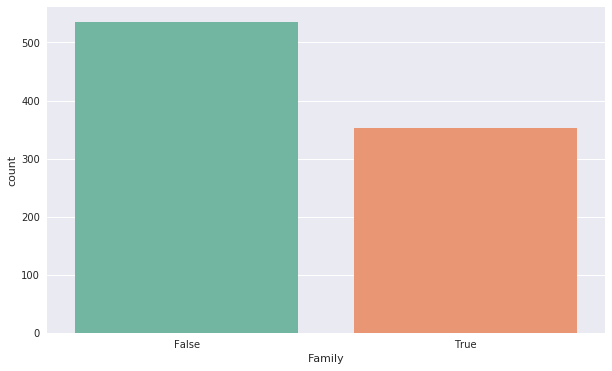

In [33]:
plt.subplots(figsize=(10,6))
sns.set(style="darkgrid")

ax = sns.countplot(x="Family", data=df,palette = 'Set2')
plt.show()

352 passengers were with family an the rest 535 passengers were not.

###  Percentage of passengers survived in each Class 

In [42]:
df.groupby('Class')['Survived'].mean()*100



Class
1    62.790698
2    46.994536
3    24.130879
Name: Survived, dtype: float64

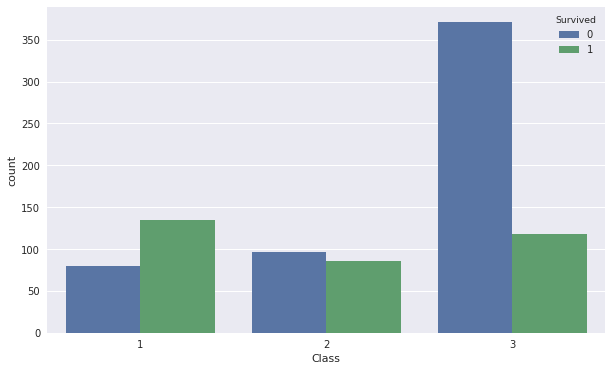

In [34]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Class',hue='Survived',data=df)
plt.show()


62.79% from Class1 46.99% from Class2 and 24.13% from Class3 survived.

### Percentage survival based on gender.

In [43]:
df.groupby('Gender')['Survived'].mean()*100


Gender
female    74.121406
male      18.641115
Name: Survived, dtype: float64

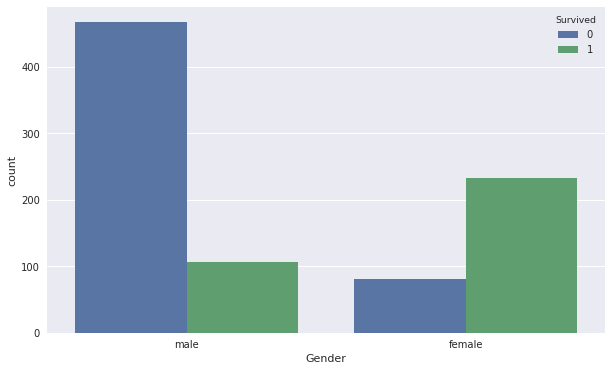

In [37]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Gender',hue='Survived',data=df)
plt.show()

Survival Percentage-->
Females    74.12%
 Males     18.64%

### Did having a family member increased the chances of survival?

In [38]:
df.groupby('Family')['Survived'].mean()*100


Family
False    30.093458
True     50.568182
Name: Survived, dtype: float64

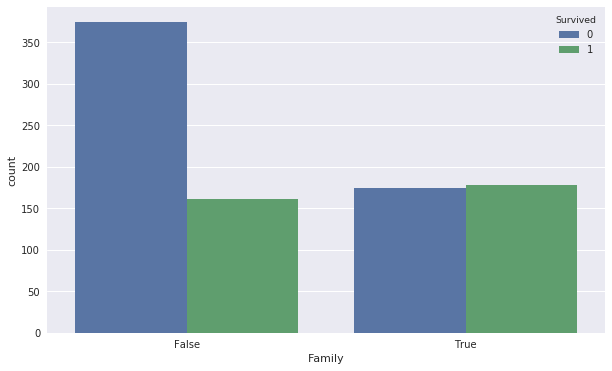

In [39]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Family',hue='Survived',data=df)
plt.show()

Having a family member did increase the survival rate.

## Training model

In [44]:
df['Gender'] = df['Gender'].map( {'female': 0, 'male': 1} ).astype(int)

In [45]:
df.describe()

,Passenger ID,Class,Gender,Age,Siblings Count,Parents Count,Fare,Survived
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,447.809470,2.308906,0.647125,29.762510,0.521984,0.383315,32202.052086,0.382187
std,256.507822,0.836093,0.478134,13.032248,1.103719,0.807466,49792.334908,0.486196
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7895.800000,0.000000
50%,448.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14454.200000,0.000000
75%,669.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31000.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512329.200000,1.000000


In [46]:
df['Embarked'] = df['Embarked'].map( {'New York': 0, 'Los Angeles': 1 , 'Chicago':2} ).astype(int)

In [47]:
df.head()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children,Family
0,1,3,Alexander Harris,1,22.0,1,0,7250.0,0,0,False,True
1,2,1,Frank Parsons,0,38.0,1,0,71283.3,1,1,False,True
2,3,3,Anthony Churchill,0,26.0,0,0,7925.0,0,1,False,False
3,4,1,Alexandra Hughes,0,35.0,1,0,53100.0,0,1,False,True
4,5,3,Joan Fraser,1,35.0,0,0,8050.0,0,0,False,False


In [48]:
df['Family'] = df['Family'].map( {True: 1, False: 0} ).astype(int)

In [49]:
df.head()


,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children,Family
0,1,3,Alexander Harris,1,22.0,1,0,7250.0,0,0,False,1
1,2,1,Frank Parsons,0,38.0,1,0,71283.3,1,1,False,1
2,3,3,Anthony Churchill,0,26.0,0,0,7925.0,0,1,False,0
3,4,1,Alexandra Hughes,0,35.0,1,0,53100.0,0,1,False,1
4,5,3,Joan Fraser,1,35.0,0,0,8050.0,0,0,False,0


In [50]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.545455
1,"(16.336, 32.252]",0.342308
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [51]:
df.loc[df['Age'] <= 16, 'Age'] = 0
df


,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children,Family,AgeBand
0,1,3,Alexander Harris,1,22.000000,1,0,7250.0,0,0,False,1,"(16.336, 32.252]"
1,2,1,Frank Parsons,0,38.000000,1,0,71283.3,1,1,False,1,"(32.252, 48.168]"
2,3,3,Anthony Churchill,0,26.000000,0,0,7925.0,0,1,False,0,"(16.336, 32.252]"
3,4,1,Alexandra Hughes,0,35.000000,1,0,53100.0,0,1,False,1,"(32.252, 48.168]"
4,5,3,Joan Fraser,1,35.000000,0,0,8050.0,0,0,False,0,"(32.252, 48.168]"
5,6,3,Megan Clarkson,1,30.740378,0,0,8458.3,2,0,False,0,"(16.336, 32.252]"
6,7,1,Molly Bower,1,54.000000,0,0,51862.5,0,0,False,0,"(48.168, 64.084]"
7,8,3,Steven Jones,1,0.000000,3,1,21075.0,0,0,True,1,"(0.34, 16.336]"
8,9,3,Bernadette Vance,0,27.000000,0,2,11133.3,0,1,False,1,"(16.336, 32.252]"
10,11,3,Gavin Payne,0,0.000000,1,1,16700.0,0,1,True,1,"(0.34, 16.336]"


In [52]:
df.loc[(df['Age'] >16) & (df['Age'] <=32), 'Age'] = 1


In [53]:
df.loc[(df['Age'] >32) & (df['Age'] <=48), 'Age'] = 2


In [54]:
df.loc[(df['Age'] >48) & (df['Age'] <=64), 'Age'] = 3


In [55]:
df.loc[(df['Age'] >64) & (df['Age'] <=100), 'Age'] = 4



In [56]:
df


,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children,Family,AgeBand
0,1,3,Alexander Harris,1,1.0,1,0,7250.0,0,0,False,1,"(16.336, 32.252]"
1,2,1,Frank Parsons,0,2.0,1,0,71283.3,1,1,False,1,"(32.252, 48.168]"
2,3,3,Anthony Churchill,0,1.0,0,0,7925.0,0,1,False,0,"(16.336, 32.252]"
3,4,1,Alexandra Hughes,0,2.0,1,0,53100.0,0,1,False,1,"(32.252, 48.168]"
4,5,3,Joan Fraser,1,2.0,0,0,8050.0,0,0,False,0,"(32.252, 48.168]"
5,6,3,Megan Clarkson,1,1.0,0,0,8458.3,2,0,False,0,"(16.336, 32.252]"
6,7,1,Molly Bower,1,3.0,0,0,51862.5,0,0,False,0,"(48.168, 64.084]"
7,8,3,Steven Jones,1,0.0,3,1,21075.0,0,0,True,1,"(0.34, 16.336]"
8,9,3,Bernadette Vance,0,1.0,0,2,11133.3,0,1,False,1,"(16.336, 32.252]"
10,11,3,Gavin Payne,0,0.0,1,1,16700.0,0,1,True,1,"(0.34, 16.336]"


In [57]:
df.head()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Children,Family,AgeBand
0,1,3,Alexander Harris,1,1.0,1,0,7250.0,0,0,False,1,"(16.336, 32.252]"
1,2,1,Frank Parsons,0,2.0,1,0,71283.3,1,1,False,1,"(32.252, 48.168]"
2,3,3,Anthony Churchill,0,1.0,0,0,7925.0,0,1,False,0,"(16.336, 32.252]"
3,4,1,Alexandra Hughes,0,2.0,1,0,53100.0,0,1,False,1,"(32.252, 48.168]"
4,5,3,Joan Fraser,1,2.0,0,0,8050.0,0,0,False,0,"(32.252, 48.168]"


In [59]:
X = df.drop(["Survived","Name","Children","Passenger ID","AgeBand"],axis = 1)

y = df['Survived']

In [60]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/home/anupam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
X_train

,Class,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Family
367,3,0,1.0,0,0,7229.2,1,0
259,2,0,3.0,0,1,26000.0,0,1
480,3,1,0.0,5,2,46900.0,0,1
275,1,0,3.0,1,0,77958.3,0,1
557,1,1,1.0,0,0,227525.0,1,0
771,3,1,2.0,0,0,7854.2,0,0
235,3,0,1.0,0,0,7550.0,0,0
539,1,0,1.0,0,2,49500.0,1,1
166,1,0,1.0,0,1,55000.0,0,1
662,1,1,2.0,0,0,25587.5,0,0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log





76.87

In [64]:
svc = SVC()
svc.fit(X_train, y_train)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc


88.29

In [65]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.19

In [66]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_scores = random_forest.predict(X_test)
acc_rf = round(random_forest.score(X_train, y_train) * 100, 2)
acc_rf


95.06

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_scores)
cm

array([[91, 11],
       [24, 52]])

In [68]:
accuracy = (91+52)/(91+11+24+52)

In [69]:
accuracy

0.8033707865168539

In [70]:
import xgboost as xgb

In [71]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators=10, objective='binary:logistic', seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.780899


/home/anupam/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
